In [62]:
# Модуль для работы с данными fashion_mnist
from tensorflow.keras.datasets import fashion_mnist
# Подключение модели Sequential (слои идут друг за другом, последовательно)
from tensorflow.keras.models import Sequential
# Для полносвязной нейронной сети подключаем тип слоя Dense
from tensorflow.keras.layers import Dense
# Подключение различных утилит keras
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Подготовка данных

In [63]:
# Загружаем данные: 60 тыс. изображений, чб 28*28
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

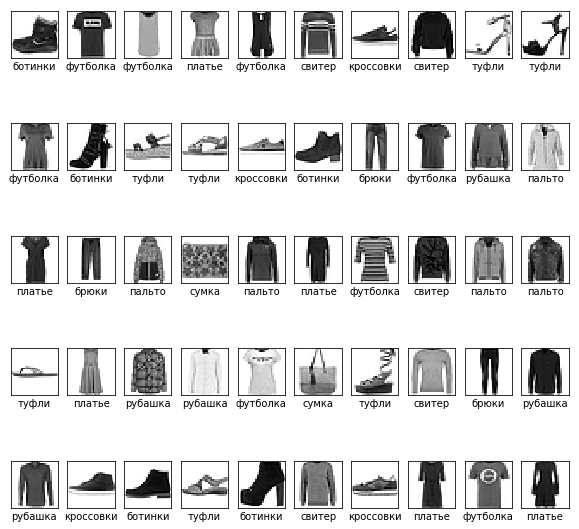

In [64]:
# Список с названиями классов
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки',
           'сумка', 'ботинки']
# просматриваем примеры изображений


plt.figure(figsize=(10,10))
for i in range(0,50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [65]:
# Преобразование размерности изображений в плоский вектор 
# 28*28 -> 784
x_train = x_train.reshape(60000, 784)
# Нормализация данных: делим интенсивность каждого пискселя в изображении на 255.
# Т.о. данные для входа в нейронную сеть варьируются в диапазоне от 0 до 1
x_train = x_train / 255

In [66]:
# Формат one hot encoding
y_train = utils.to_categorical(y_train, 10)

## Создание нейронной сети

In [67]:
# Создаем модель класса Sequential
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

In [68]:
# Компилируем модель 
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, y_train,
                   batch_size=200
                   epochs=10,
                   verbose=1)

In [41]:
# Запускаем распознавание набора данных, на котором обучалась сеть
predictions = model.predict(x_train)

## Проверяем качество распознавания

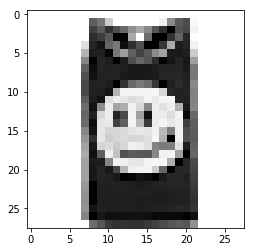

In [59]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 101
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [60]:
# Данные на выходе из сети в формате one-hot-encoding
print(predictions[n])

[2.0873667e-01 3.6651830e-03 1.0193116e-02 2.2639036e-01 4.4784784e-02
 1.8048207e-05 5.0252724e-01 1.5777975e-06 3.6711036e-03 1.1997099e-05]


In [61]:
print('Предсказанный номер класса: ',np.argmax(predictions[n]))
print('Название предсказанного класса:',classes[np.argmax(predictions[n])])
print('Истинный номер класса: ',np.argmax(y_train[n]))
print('Название истинного класса:',classes[np.argmax(y_train[n])])

Предсказанный номер класса:  6
Название предсказанного класса: рубашка
Истинный номер класса:  0
Название истинного класса: футболка
